# The basics of Jupyter Notebook... and how to keep it tidy

## Import libraries, packages and functions

In [1]:
# the basics, necessary to process and plot data
import numpy as np
import matplotlib.pyplot as plt
import h5py # necessary to read h5 files containing data and metadata

# make sure that you are in the right working directory
import os 
currentDirectory = os.getcwd()
print currentDirectory

/home/cam/Documents/WORK/GitCodes/example_notebook


/home/cam/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Declare your custom functions here

def myfunction(x,y):
    return x*y
    
....

Note: you can also create an initialisation file with the list of functions and packages (including home-coded functions in separate files) that you want to import. You could name it "functions.py" for example. You would then write:

from functions import *

An example file "functions.py" is provided, let's import it:

In [2]:
from functions import *
test()

test function ok


## Good practice...

declare global parameters here, such as physical constants, unit conversion factors, laws of physics used, visualisation parameters (colour scheme, graphics, fonts, ...), enable or disable functionalities (for example, if you are going to be printing or plotting intermediate results to assess the quality of the data analysis step by step... that can take up a lot of memory and slow the analysis down, so you may want to disable it easily later on)

In [3]:
# examples:

sample_name = 'MAPbBr3_single_crystal'

#assumption:
gravity = 0 #g

# constants:
planck = 6.62607015*1e-34 #J.s
sample_area = 3*1e-2 # m^2
objective_NA = 0.95

#laws:
theta = lambda x, z: np.arctan(np.abs(0.5*x)/float(z))
cosine = lambda x : np.cos(x)

#parameters:
sata_sampling = 1000
data_binning = False

#visualisation:
colour_scheme = 'plasma'
display_raw_data = True

# etc....


you can also define all these parameters in a dictionnary in a parameter file, called for example "params.py", and read this file directly: 

from params import parameters

In [4]:
from params import parameters
print parameters

{'parameter name': 'value'}


In general, is it better to create a package to store the files containing your code. For the sake of this example, let's create a package "codeFiles". To do that, create a directory named "codeFiles" within your working directory (where you notebook file is saved). In this directory, create a file named "__ init __ .py". It can be left empty.
Then, place in this codeFiles folder your .py files in which you wrote your code.

To import your custom package, just type:
import codeFiles

An example codeFiles package with a startup.py file containing both a list of functions to import and a dictionnary of the parameters used ( and more complex / advanced features) is provided together with this notebook. You could then just write in this notebook:

In [5]:
import codeFiles
#from codeFiles import startup

package codeFiles


In [6]:
from codeFiles.startup import *

Base modules loaded
Parameters loaded

Your custom settings:

desired repository for file read/write :

{   'path': '/home/cam/Documents/WORK/Diffusion project/Diffusion_fiber_scan/',
    'subpath': {   '2D crystals': '/home/cam/Documents/WORK/Diffusion project/Diffusion_fiber_scan/2D_crystals/',
                   'single crystals': '/home/cam/Documents/WORK/Diffusion project/Diffusion_fiber_scan/single_crystals/'}}

your computer information :

{   'architecture': ('64bit', ''),
    'machine': 'x86_64',
    'node': 'CamPad',
    'platform': 'Linux-4.15.0-74-generic-x86_64-with-debian-buster-sid',
    'processor': 'x86_64',
    'python_build': ('default', 'May  1 2018 23:32:55'),
    'python_compiler': 'GCC 7.2.0',
    'python_implementation': 'CPython',
    'python_version': '2.7.15',
    'release': '4.15.0-74-generic',
    'system': 'Linux',
    'uname': (   'Linux',
                 'CamPad',
                 '4.15.0-74-generic',
                 '#84-Ubuntu SMP Thu Dec 19 08:06:28

In [7]:
parameters

{'edge suppression': 10,
 'flat limit': 80,
 'hidden_peak_slope': [1, 33],
 'maxDecory': 10,
 'max_nb_of_peaks': 1,
 'ordered type': 'linear',
 'path': '/home/cam/Documents/WORK/Diffusion project/Diffusion_fiber_scan/',
 'peaks min-height': 5,
 'poly_order': 3,
 'search peak': True,
 'search peak finesse': 40,
 'subpath': {'2D crystals': '/home/cam/Documents/WORK/Diffusion project/Diffusion_fiber_scan/2D_crystals/',
  'single crystals': '/home/cam/Documents/WORK/Diffusion project/Diffusion_fiber_scan/single_crystals/'},
 'testing': False,
 'validFitting': 5}

## Import your data

Usually, you'll ask Python to read your data in one or several files and import them into a set of arrays. The best solution here is to write a proper dataImport function in a separate .py file suited for the type and structure of your datafiles. There is no strandard method, it really depends on your needs. The h5 (or hdf5) file format is broadly used, and very convenient. It allows to store metadata (such as lab equipment settings, status and parameters) as well as data arrays in the same file.

Use this line of code to import your data and metadata, and then explore their content the way you want:

dat = h5py.File(filename, 'r')

(note: here in the future I'll try to give an example of h5 file exploration step by step...)

## Data processing

Now that your notebook environment is all set, you can use pre-existing functions from python libraries and your custom functions (code written above or in separate files, which is more tidy and easier to troubleshoot) to do your data processing.

## Visualisation

Let's plot a simple function over a given interval

Text(0,0.5,'cos(x)')

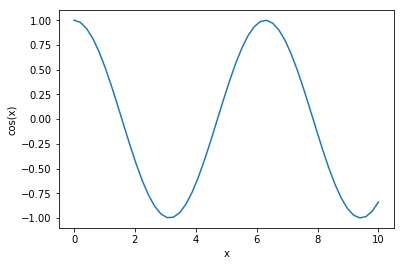

In [8]:
# use the function 'cosine' defined earlier

# define the interval:
x_values = np.linspace(0,10,50)

# evaluate the function on this interval:
y_values = map(cosine, x_values)

# plot
plt.plot(x_values, y_values)
# add label names:
plt.xlabel('x')
plt.ylabel('cos(x)')

What about 2D plots?

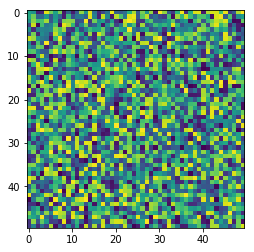

In [9]:
# generate random 2D array of size 50:
N = 50
array = np.random.random((N,N))

# plot the 2D array:
plt.imshow(array)